In [1]:
import numpy as np
import cv2

In [2]:

from google.colab.patches import cv2_imshow

reading a image

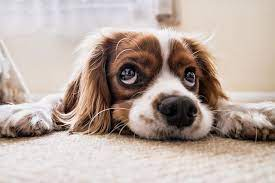

In [4]:
img=cv2.imread("/content/dog-download.jpeg")
cv2_imshow(img)

reading a video
video-mp3,mp4
audio-mp2,mp1

In [18]:
capture = cv2.VideoCapture('/content/dogs.mp4')#(capture var is the instance of capture class)

while True:
    isTrue, frame = capture.read()#(capturing the image is different from capturing the video,here we use loop to capture the video frame by frame)
    if not isTrue:
        break

    cv2.imshow('Video Frame', frame)#(displaying the images frame by frame)

    if cv2.waitKey(20) & 0xFF == ord('d'):#(stoping the video from playing infintly and also if the letter d is pressed then break of loop )
        break


#print(frame.shape)
capture.release()
cv2.destroyAllWindows()


rescaling and resizing(to reduce computation power)

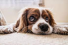

In [29]:
img=cv2.imread('/content/dog-download.jpeg')
#cv2_imshow(img)

def rescaleFrame(frame,scale=0.25):#(writing the fun to rescale by setting the frame to be resized and scale value)
   width=int(frame.shape[1]*scale)#setting the width and height
   height=int(frame.shape[0]*scale)
   dimensions=(width,height)
   return cv2.resize(frame,dimensions,interpolation=cv2.INTER_AREA)#interpolation is adding/removing the pixel values as we enlarge the image or shrink the image
   #inter_area-shrinking,inter_linear/inter_cubic(slow but high quality)-enlarging of img
resized_image=rescaleFrame(img)
cv2_imshow(resized_image)

capture=cv2.VideoCapture('/content/dogs.mp4')
# while True:
#      isTrue,frame=capture.read()
#      frame_resized=rescaleFrame(frame)
#      #cv2_imshow(frame)
#      cv2_imshow(frame_resized)

#      if cv2.waitKey(20) & 0xff==ord('d'):
#        break
while True:
    isTrue, frame = capture.read()
   #frame_resized=rescaleFrame(frame)
    if not isTrue:
        break
    frame_resized=rescaleFrame(frame)
    cv2_imshow('Video Frame',frame_resized)

    if cv2.waitKey(20) & 0xFF == ord('d'):
        break
capture.release()

#cv2.destoryAllWindows
#cv2.waitkey(0)


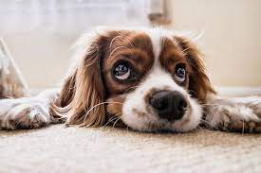

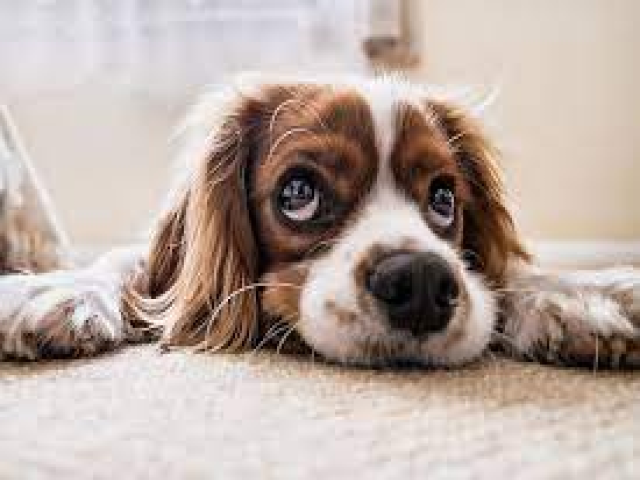

In [36]:

img = cv2.imread("/content/dog-download.jpeg")

def rescaleFrame(frame, scale=0.95):
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)
    dimensions = (width, height)
    return cv2.resize(frame, dimensions, interpolation=cv2.INTER_AREA)

resized_image = rescaleFrame(img)
cv2_imshow(resized_image)

# Change the resolution of the image
def changeRes(frame, width, height):#changing the resolution the image passing w,h
    return cv2.resize(frame, (width, height), interpolation=cv2.INTER_AREA)

new_res_image = changeRes(img, 640, 480)  # Change to the desired width and height
cv2_imshow(new_res_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

drawing images and writing text

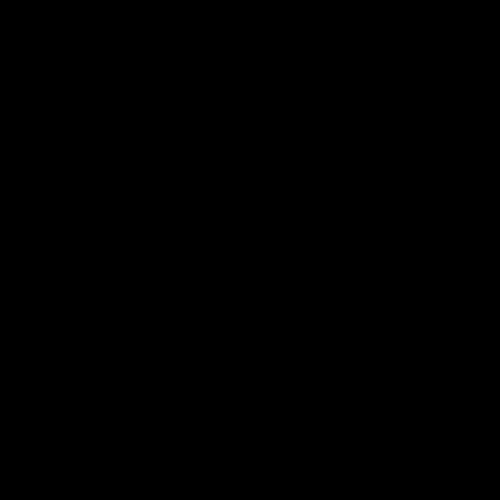

In [ ]:
blank=np.zeros((500,500),dtype='uint8')#creates blank space of size specified with np.zeros,np.ones
cv2_imshow( blank)

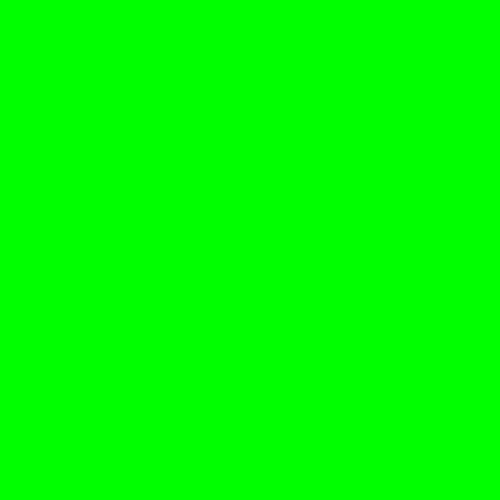

In [ ]:
blank=np.zeros((500,500,3),dtype='uint8')
blank[:]=0,255,0#total size of frame
cv2_imshow( blank)

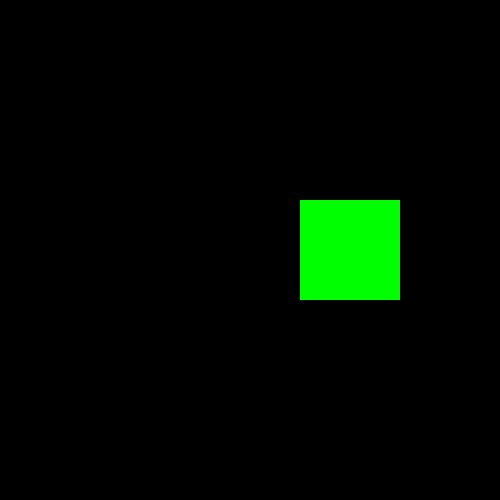

In [ ]:
blank=np.zeros((500,500,3),dtype='uint8')
blank[200:300,300:400]=0,255,0# specifing the size and location
cv2_imshow( blank)

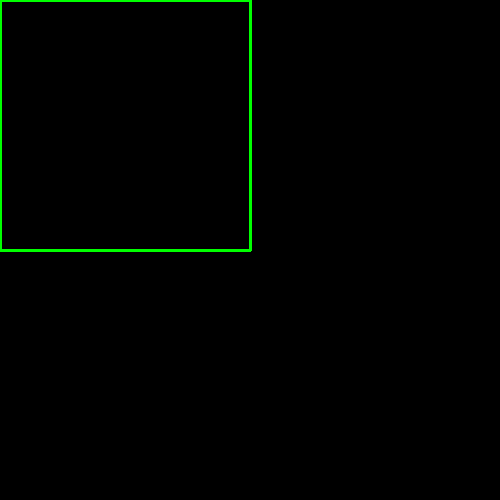

In [ ]:
blank=np.zeros((500,500,3),dtype='uint8')
cv2.rectangle(blank,(0,0),(250,250),(0,255,0),thickness=2)#specifing the shape starting point end point,color of line and thickness
cv2_imshow(blank)

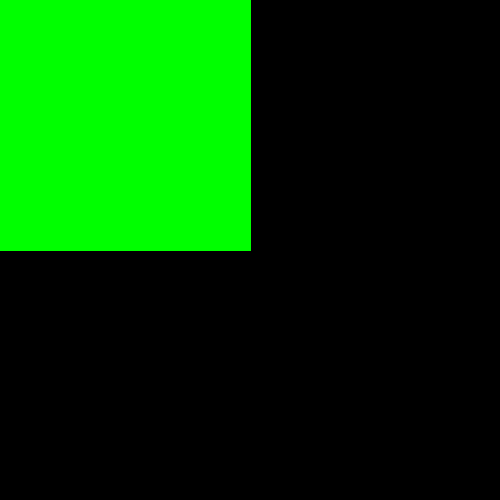

In [ ]:

blank=np.zeros((500,500,3),dtype='uint8')
#cv2.rectangle(blank,(0,0),(250,250),(0,255,0),thickness=-1) or
cv2.rectangle(blank,(0,0),(250,250),(0,255,0),thickness=cv2.FILLED)#filling/-1 the area with color
cv2_imshow(blank)

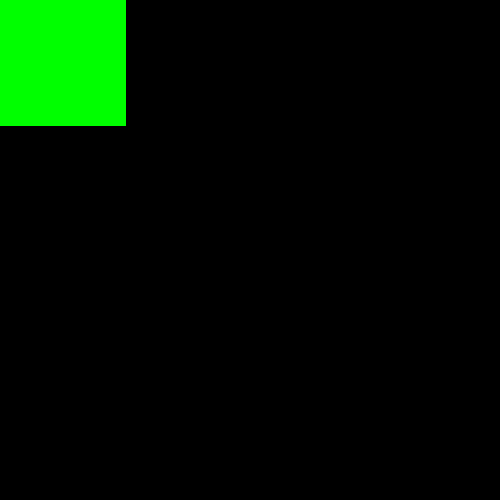

In [ ]:
blank=np.zeros((500,500,3),dtype='uint8')
#cv2.rectangle(blank,(0,0),(250,250),(0,255,0),thickness=-1) or
cv2.rectangle(blank,(0,0),(blank.shape[1]//4,blank.shape[0]//4),(0,255,0),thickness=cv2.FILLED)#specifing the block size in different format
cv2_imshow(blank)

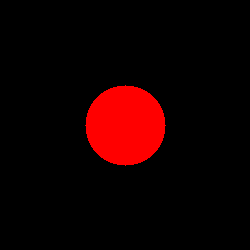

In [ ]:
blank=np.zeros((250,250,3),dtype='uint8')
#cv2.circle(blank,(blank.shape[1]//2,blank.shape[0]//2),40,(0,0,255),thickness=3)

cv2.circle(blank,(blank.shape[1]//2,blank.shape[0]//2),40,(0,0,255),thickness=-1)#different shape
cv2_imshow(blank)

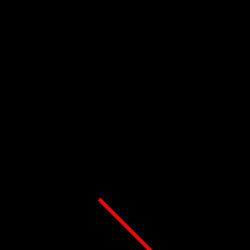

In [ ]:
blank=np.zeros((250,250,3),dtype='uint8')
cv2.line(blank,(100,200),(350,450),(0,0,255),thickness=3)#drawing the line with location start point(100,200) and (350,450) end point
#cv2.line(blank,(0,0),(blank.shape[1]//2,blank.shape[0]//2),(0,0,255),thickness=3)
cv2_imshow(blank)

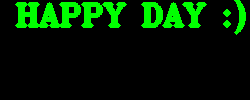

In [ ]:
blank=np.zeros((100,250,3),dtype='uint8')#since (100, 100, 1) will create a grayscale image, color images (BGR or RGB) require 3 channels, 1 each for Red, Blue and Green
cv2.putText(blank,"HAPPY DAY :)",(15,25),cv2.FONT_HERSHEY_TRIPLEX,1.0,(0,255,0),3)#text to write,start pt and inbuilt font style,font scale,colour,thickness.
cv2_imshow(blank)

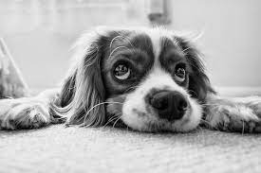

In [ ]:
#img=cv2.imread("/content/thv.jpeg")#converting the img from color-gray based on pixel intensity rather than color
gray=cv2.cvtColor(resized_image,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

blur-removing noise in the image(cause of bad lighting,camera quality etc)

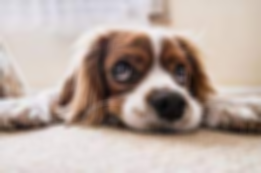

In [ ]:
blur=cv2.GaussianBlur(resized_image,(7,7),cv2.BORDER_DEFAULT)#kernal size-(7,7)-an odd number,cv2.copyMakeBorder() method is used to create a border around the image like a photo frame.
cv2_imshow(blur)

canny edge detection

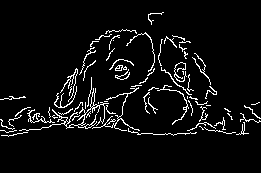

In [ ]:

edges = cv2.Canny(resized_image,400,200)#left,right threshold values
cv2_imshow(edges)

Morphological operations are a set of operations that process images based on shapes. They apply a structuring element to an input image and generate an output image.
The most basic morphological operations are two: Erosion and Dilation

Basics of Erosion:

Erodes away the boundaries of the foreground object,
Used to diminish the features of an image.

Basics of dilation:

Increases the object area,
Used to accentuate features

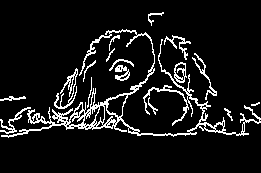

In [ ]:
dilate=cv2.dilate(edges,(3,3),iterations=1)#kernal size , bluring with no.of iter
cv2_imshow(dilate)

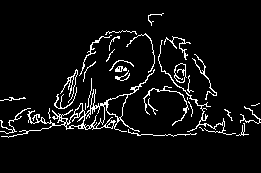

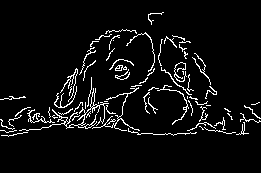

In [ ]:
eroded=cv2.erode(dilate,(3,3),iterations=1)
cv2_imshow(eroded)
cv2_imshow(edges)

resize and crop images

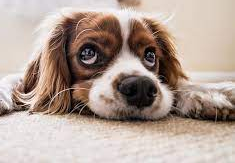

In [ ]:
cropped=img[20:250,40:450]#cropping through array slicing
cv2_imshow(cropped)


image translation(changing through x,y axis)

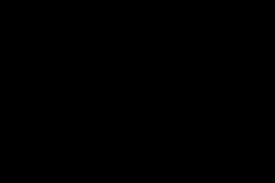

In [ ]:
def translate(resized_image,x,y):
  transmat=np.float32([[1,1,x],[0,1,y]])#(left/right,diagonal,up/down)
  dimensions=(img.shape[1],img.shape[0])
  return cv2.warpAffine(img,transmat,dimensions)
  #-x=left
  #-y=up
  #x=right
  #y=down
trans=translate(resized_image,-200,-200)
cv2_imshow(trans)

rotation-with opencv we can specify any point for rotating the img

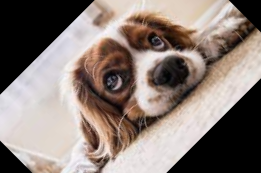

In [ ]:
def rotate(resized_image,angle,rotpoint=None):
  (height,width)=resized_image.shape[:2]

  if rotpoint is None:
    rotpoint=(width//2,height//2)
  rotmat=cv2.getRotationMatrix2D(rotpoint,angle,1.0)
  dimensions=(width,height)
  return cv2.warpAffine(resized_image,rotmat,dimensions)

rotated=rotate(resized_image,45)
cv2_imshow(rotated)



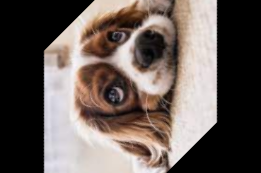

In [ ]:
def rotate(resized_image,angle,rotpoint=None):
  (height,width)=resized_image.shape[:2]

  if rotpoint is None:
    rotpoint=(width//2,height//2)
  rotmat=cv2.getRotationMatrix2D(rotpoint,angle,1.0)
  dimensions=(width,height)
  return cv2.warpAffine(resized_image,rotmat,dimensions)

rotated=rotate(resized_image,45)
#cv2_imshow(rotated)
rot=rotate(rotated,45)#rotating the rotated image
cv2_imshow(rot)

flipping the image

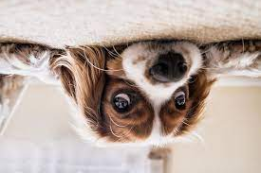

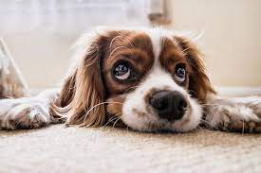

In [ ]:
flip=cv2.flip(resized_image,0)#0-around x-axis,1-around y-axis,-1-both
cv2_imshow(flip)
cv2_imshow(resized_image)

countour detection-boundary of an object not edges

The main objective of contour detection is find a closed shape and draw the boundary of the object

Edge detection just gives points where image intensity changes drastically. It may or may not form a closed shape.

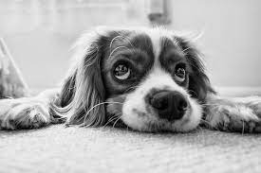

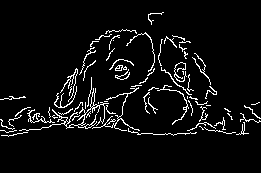

In [ ]:
gray=cv2.cvtColor(resized_image,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
edges = cv2.Canny(resized_image,400,200)#left,right threshold values
cv2_imshow(edges)
#countours,hierarchies =cv2.findCountours(edges,cv2.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)

contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [ ]:
cv2.drawContours(resized_image, contours, -1, (0,255,0), 3)

array([[[216, 210, 211],
        [216, 210, 211],
        [216, 210, 211],
        ...,
        [182, 195, 209],
        [182, 195, 209],
        [182, 195, 209]],

       [[217, 211, 212],
        [217, 211, 212],
        [216, 210, 211],
        ...,
        [182, 195, 209],
        [182, 195, 209],
        [182, 195, 209]],

       [[218, 212, 213],
        [218, 212, 213],
        [218, 212, 213],
        ...,
        [182, 195, 209],
        [182, 195, 209],
        [182, 195, 209]],

       ...,

       [[207, 214, 223],
        [207, 214, 223],
        [208, 215, 224],
        ...,
        [212, 218, 225],
        [211, 216, 225],
        [211, 216, 225]],

       [[200, 207, 216],
        [201, 208, 217],
        [202, 209, 218],
        ...,
        [208, 214, 220],
        [207, 213, 221],
        [207, 212, 221]],

       [[193, 200, 209],
        [194, 201, 210],
        [196, 203, 212],
        ...,
        [202, 208, 215],
        [202, 207, 216],
        [202, 207, 216]]

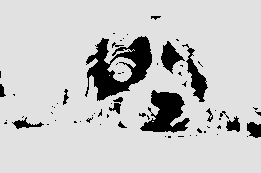

In [ ]:
gray=cv2.cvtColor(resized_image,cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(gray,125,225,cv2.THRESH_BINARY)
cv2_imshow(thresh)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

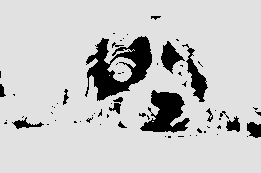

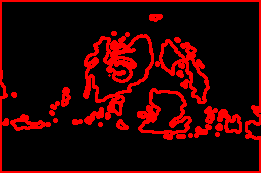

In [ ]:
blank=np.zeros(resized_image.shape,dtype='uint8')
gray=cv2.cvtColor(resized_image,cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(gray,125,225,cv2.THRESH_BINARY)
cv2_imshow(thresh)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(blank,contours,-1,(0,0,255),2)
cv2_imshow(blank)

spliting the images as b,g,r

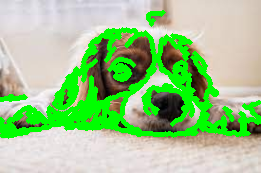

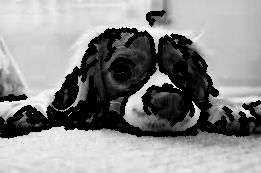

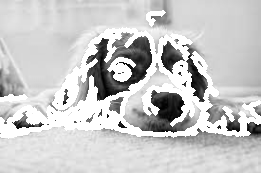

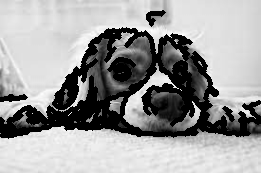

(173, 261, 3)
(173, 261)
(173, 261)
(173, 261)


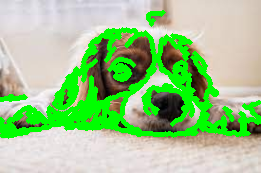

In [ ]:
b,g,r =cv2.split(resized_image)#by default images are depicted as gray scale images of pixel intensity
cv2_imshow(resized_image)
cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)
#cv2_imshow(resized_image)
print(resized_image.shape)
print(b.shape)
print(g.shape)
print(r.shape)
merged=cv2.merge([b,g,r])
cv2_imshow(merged)


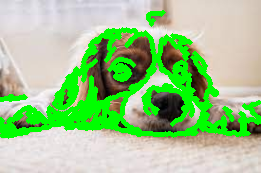

error: ignored

In [ ]:
blank=np.zeros(resized_image.shape,dtype='uint8')
b,g,r =cv2.split(resized_image)#by default images are depicted as gray scale images of pixel intensity
blue=cv2.merge([b,blank,blank])
green=cv2.merge([blank,g,blank])
red=cv2.merge([blank,blank,r])
cv2_imshow(resized_image)
cv2_imshow(blue)
cv2_imshow(green)
cv2_imshow(red)

blur


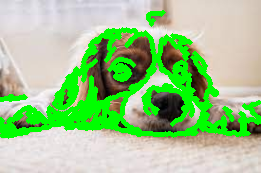

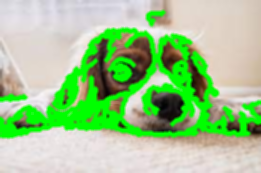

In [ ]:
cv2_imshow(resized_image)
#average blur
avg=cv2.blur(resized_image,(3,3))
cv2_imshow(avg)

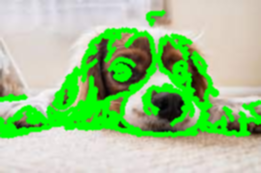

In [ ]:
#guassian blur (less blur than avg blur)
guass=cv2.GaussianBlur(resized_image,(3,3),0)#0-standard deviation in x dir
cv2_imshow(guass)


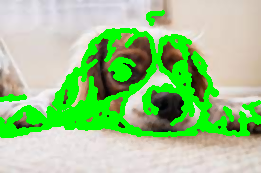

In [ ]:
#median blur-reduces salt and pepper noise
#NOT ment to be used with high kernal size
med=cv2.medianBlur(resized_image,3)
cv2_imshow(med)

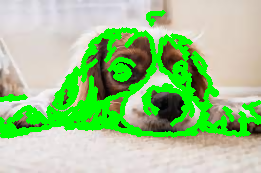

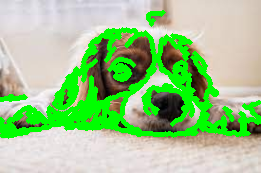

In [ ]:
#billateral filter
bilateral=cv2.bilateralFilter(resized_image,5,15,15)#it takes d as a distance of a pixel that can effect the mid pixel of bilateral filter
cv2_imshow(bilateral)
cv2_imshow(resized_image)

bitwise operation on images

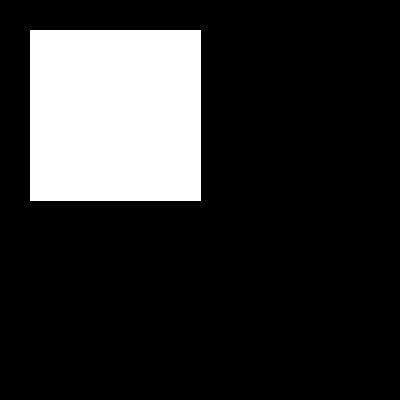

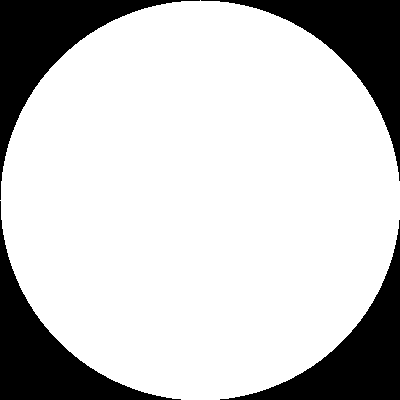

In [ ]:
blank=np.zeros((400,400),dtype='uint8')
rectangle=cv2.rectangle(blank.copy(),(30,30),(200,200),255,-1)
circle=cv2.circle(blank.copy(),(200,200),200,255,-1)
cv2_imshow(rectangle)
cv2_imshow(circle)

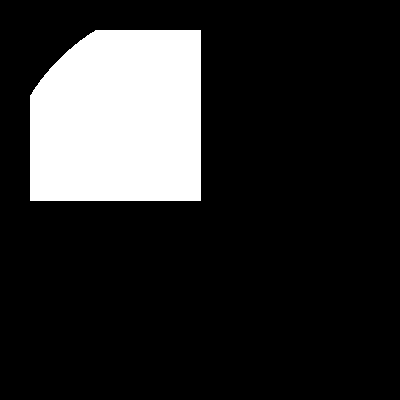

In [ ]:
#and
bitwise_and=cv2.bitwise_and(rectangle,circle)
cv2_imshow(bitwise_and)

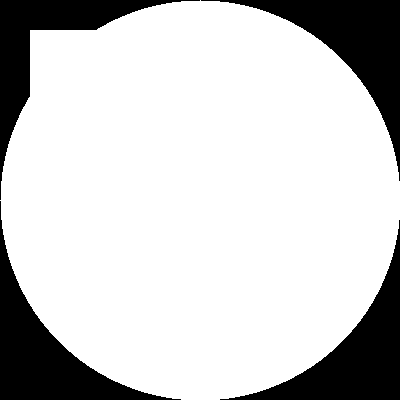

In [ ]:
bitwise_or=cv2.bitwise_or(rectangle,circle)
cv2_imshow(bitwise_or)

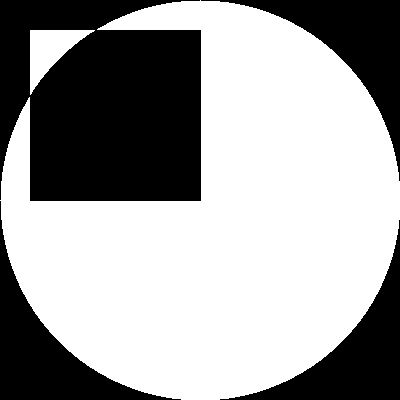

In [ ]:
bitwise_xor=cv2.bitwise_xor(rectangle,circle)
cv2_imshow(bitwise_xor)

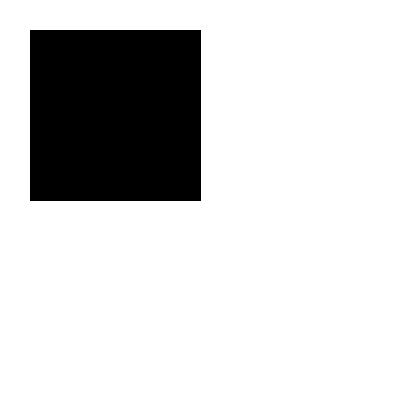

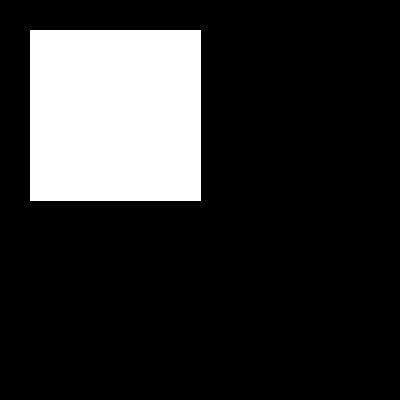

In [ ]:
bitwise_not=cv2.bitwise_not(rectangle)
cv2_imshow(bitwise_not)
cv2_imshow(rectangle)

masking

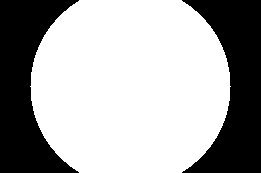

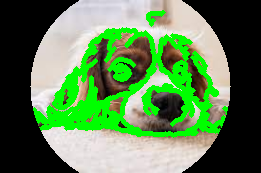

In [ ]:
from google.colab.patches import cv2_imshow
blank=np.zeros(resized_image.shape[:2],dtype='uint8')#blank img for mask should be of same size as os img
#cv2_imshow(blank)
mask=cv2.circle(blank, (resized_image.shape[1]//2,resized_image.shape[0]//2),int(100),int(255), -1)
cv2_imshow(mask)#mask can be of any shape rect

masked=cv2.bitwise_and(resized_image,resized_image,mask=mask)
cv2_imshow(masked)

histogram

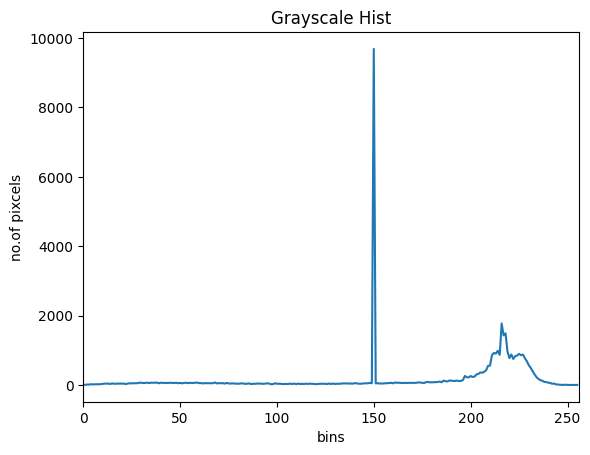

In [ ]:
import matplotlib.pyplot as plt
gray=cv2.cvtColor(resized_image,cv2.COLOR_BGR2GRAY)
#cv2_imshow(gray)
gray_hist=cv2.calcHist([gray],[0],None,[256],[0,256])#TAKES ELE AS LIST,O-CHANNELS,256-BINS
plt.figure()
plt.title('Grayscale Hist')
plt.xlabel("bins")
plt.ylabel("no.of pixcels")
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()

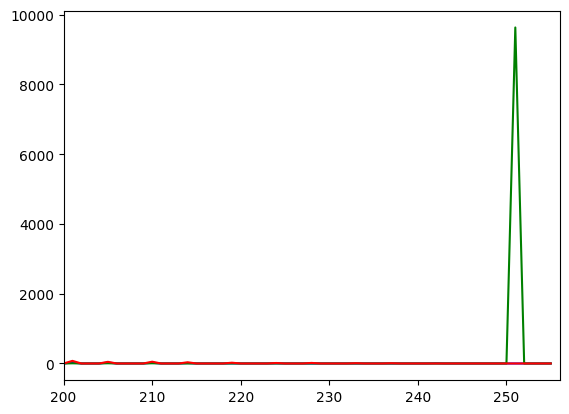

In [ ]:
#color_hist
colors=('b','g','r')
for i,col in enumerate(colors):
  hist=cv2.calcHist([resized_image],[i],None,[256],[200,256])
  plt.plot(hist,color=col)
  plt.xlim([200,256])

plt.show()

In [ ]:
#binary thresholding

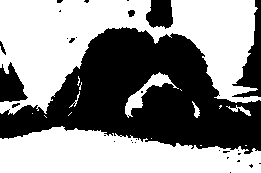

In [ ]:
gray=cv2.cvtColor(resized_image,cv2.COLOR_BGR2GRAY)
threshold,thresh=cv2.threshold(gray,200,255,cv2.THRESH_BINARY)
cv2_imshow(thresh)

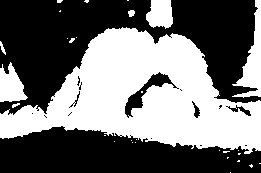

In [ ]:
gray=cv2.cvtColor(resized_image,cv2.COLOR_BGR2GRAY)
threshold,thresh=cv2.threshold(gray,200,255,cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)

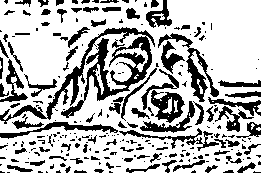

In [ ]:
#adaptive thresholding lets computer check the pixecls and find the optimal threshold value it binarises the image
adaptive_thresh=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,3)
cv2_imshow(adaptive_thresh)

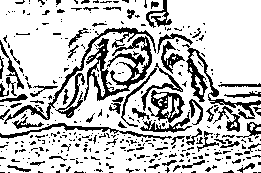

In [ ]:
adaptive_thresh=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,3)
cv2_imshow(adaptive_thresh)

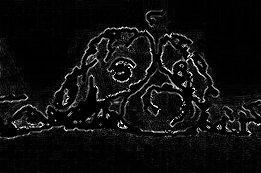

In [ ]:
#EDGE DETECTION,
gray=cv2.cvtColor(resized_image,cv2.COLOR_BGR2GRAY)
lap=cv2.Laplacian(gray,cv2.CV_64F)
lap=np.uint8(np.absolute(lap))
cv2_imshow(lap)

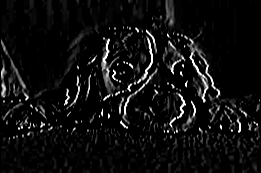

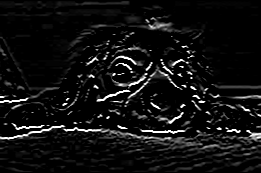

In [ ]:
sobelx=cv2.Sobel(gray,cv2.CV_64F,1,0)
sobely=cv2.Sobel(gray,cv2.CV_64F,0,1)
cv2_imshow(sobelx)
cv2_imshow(sobely)

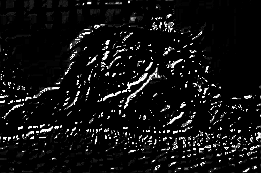

In [ ]:
combined_sobel=cv2.bitwise_or(sobelx,sobely)
cv2_imshow(combined_sobel)

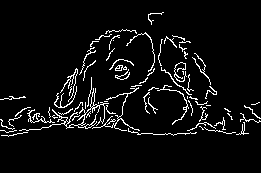

In [ ]:
cv2_imshow(edges)